## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  92.546867   839.137811  0.354887  10.315861  1.152627
1  71.999101  1514.396026  0.651768   2.561269  1.386846
2   0.775861  1659.868869  0.769438   2.363081  1.646288
3  15.203337   182.906013  0.432982   2.457127  1.386339
4  54.136048  1022.414028  0.697322   2.536659  1.535990


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9902877	total: 57.7ms	remaining: 57.6s
1:	learn: 0.9815349	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9746295	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9666921	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9565639	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9485972	total: 60ms	remaining: 9.94s
6:	learn: 0.9416315	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9343943	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9246073	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9156983	total: 61.6ms	remaining: 6.09s
10:	learn: 0.9084312	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8994572	total: 62.5ms	remaining: 5.14s
12:	learn: 0.8925331	total: 62.9ms	remaining: 4.78s
13:	learn: 0.8842968	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8749715	total: 64ms	remaining: 4.2s
15:	learn: 0.8681031	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8582361	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8523323	total: 65.4ms	remaining: 3.57s
18:	learn: 0.8481722	total: 65.7ms	remaining: 3.3

115:	learn: 0.4609546	total: 102ms	remaining: 778ms
116:	learn: 0.4589790	total: 103ms	remaining: 775ms
117:	learn: 0.4574065	total: 103ms	remaining: 771ms
118:	learn: 0.4552896	total: 104ms	remaining: 767ms
119:	learn: 0.4529101	total: 104ms	remaining: 763ms
120:	learn: 0.4513496	total: 104ms	remaining: 759ms
121:	learn: 0.4497070	total: 105ms	remaining: 755ms
122:	learn: 0.4472832	total: 105ms	remaining: 751ms
123:	learn: 0.4447559	total: 106ms	remaining: 746ms
124:	learn: 0.4435631	total: 106ms	remaining: 741ms
125:	learn: 0.4408615	total: 106ms	remaining: 737ms
126:	learn: 0.4378823	total: 107ms	remaining: 733ms
127:	learn: 0.4354905	total: 107ms	remaining: 729ms
128:	learn: 0.4327945	total: 108ms	remaining: 726ms
129:	learn: 0.4312963	total: 108ms	remaining: 724ms
130:	learn: 0.4294523	total: 109ms	remaining: 722ms
131:	learn: 0.4272181	total: 109ms	remaining: 718ms
132:	learn: 0.4255767	total: 110ms	remaining: 716ms
133:	learn: 0.4239949	total: 110ms	remaining: 711ms
134:	learn: 

279:	learn: 0.2542210	total: 181ms	remaining: 466ms
280:	learn: 0.2535950	total: 182ms	remaining: 465ms
281:	learn: 0.2533151	total: 184ms	remaining: 469ms
282:	learn: 0.2529400	total: 185ms	remaining: 468ms
283:	learn: 0.2518190	total: 185ms	remaining: 467ms
284:	learn: 0.2515452	total: 186ms	remaining: 465ms
285:	learn: 0.2506914	total: 186ms	remaining: 465ms
286:	learn: 0.2499197	total: 187ms	remaining: 464ms
287:	learn: 0.2495592	total: 187ms	remaining: 462ms
288:	learn: 0.2484664	total: 188ms	remaining: 461ms
289:	learn: 0.2481622	total: 188ms	remaining: 461ms
290:	learn: 0.2477661	total: 189ms	remaining: 460ms
291:	learn: 0.2474357	total: 190ms	remaining: 460ms
292:	learn: 0.2469718	total: 190ms	remaining: 460ms
293:	learn: 0.2464937	total: 191ms	remaining: 459ms
294:	learn: 0.2460947	total: 193ms	remaining: 460ms
295:	learn: 0.2457132	total: 193ms	remaining: 460ms
296:	learn: 0.2453191	total: 194ms	remaining: 459ms
297:	learn: 0.2443926	total: 195ms	remaining: 458ms
298:	learn: 

486:	learn: 0.1636122	total: 276ms	remaining: 291ms
487:	learn: 0.1633884	total: 277ms	remaining: 290ms
488:	learn: 0.1630839	total: 277ms	remaining: 290ms
489:	learn: 0.1626885	total: 278ms	remaining: 289ms
490:	learn: 0.1623153	total: 278ms	remaining: 289ms
491:	learn: 0.1620166	total: 279ms	remaining: 288ms
492:	learn: 0.1614764	total: 280ms	remaining: 288ms
493:	learn: 0.1611134	total: 280ms	remaining: 287ms
494:	learn: 0.1604548	total: 281ms	remaining: 286ms
495:	learn: 0.1601927	total: 281ms	remaining: 286ms
496:	learn: 0.1595828	total: 282ms	remaining: 285ms
497:	learn: 0.1593261	total: 282ms	remaining: 285ms
498:	learn: 0.1588101	total: 283ms	remaining: 284ms
499:	learn: 0.1583678	total: 283ms	remaining: 283ms
500:	learn: 0.1577789	total: 284ms	remaining: 283ms
501:	learn: 0.1572762	total: 285ms	remaining: 282ms
502:	learn: 0.1569775	total: 285ms	remaining: 282ms
503:	learn: 0.1563769	total: 285ms	remaining: 281ms
504:	learn: 0.1557615	total: 286ms	remaining: 280ms
505:	learn: 

662:	learn: 0.1058122	total: 362ms	remaining: 184ms
663:	learn: 0.1055919	total: 363ms	remaining: 184ms
664:	learn: 0.1053631	total: 363ms	remaining: 183ms
665:	learn: 0.1050733	total: 364ms	remaining: 182ms
666:	learn: 0.1047631	total: 364ms	remaining: 182ms
667:	learn: 0.1045470	total: 365ms	remaining: 181ms
668:	learn: 0.1042920	total: 366ms	remaining: 181ms
669:	learn: 0.1038984	total: 366ms	remaining: 180ms
670:	learn: 0.1036744	total: 367ms	remaining: 180ms
671:	learn: 0.1033736	total: 367ms	remaining: 179ms
672:	learn: 0.1030104	total: 368ms	remaining: 179ms
673:	learn: 0.1027981	total: 368ms	remaining: 178ms
674:	learn: 0.1025225	total: 369ms	remaining: 177ms
675:	learn: 0.1022274	total: 369ms	remaining: 177ms
676:	learn: 0.1018767	total: 370ms	remaining: 176ms
677:	learn: 0.1016563	total: 370ms	remaining: 176ms
678:	learn: 0.1013679	total: 371ms	remaining: 175ms
679:	learn: 0.1010163	total: 372ms	remaining: 175ms
680:	learn: 0.1008067	total: 372ms	remaining: 174ms
681:	learn: 

850:	learn: 0.0694437	total: 458ms	remaining: 80.2ms
851:	learn: 0.0692537	total: 458ms	remaining: 79.6ms
852:	learn: 0.0691609	total: 459ms	remaining: 79.1ms
853:	learn: 0.0690105	total: 460ms	remaining: 78.6ms
854:	learn: 0.0688674	total: 460ms	remaining: 78ms
855:	learn: 0.0687506	total: 461ms	remaining: 77.5ms
856:	learn: 0.0686100	total: 461ms	remaining: 77ms
857:	learn: 0.0684700	total: 462ms	remaining: 76.4ms
858:	learn: 0.0683555	total: 462ms	remaining: 75.9ms
859:	learn: 0.0682172	total: 463ms	remaining: 75.3ms
860:	learn: 0.0680968	total: 463ms	remaining: 74.8ms
861:	learn: 0.0680075	total: 464ms	remaining: 74.3ms
862:	learn: 0.0678713	total: 465ms	remaining: 73.7ms
863:	learn: 0.0677508	total: 465ms	remaining: 73.2ms
864:	learn: 0.0676428	total: 465ms	remaining: 72.6ms
865:	learn: 0.0674574	total: 466ms	remaining: 72.1ms
866:	learn: 0.0673038	total: 466ms	remaining: 71.5ms
867:	learn: 0.0671975	total: 467ms	remaining: 71ms
868:	learn: 0.0670927	total: 467ms	remaining: 70.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

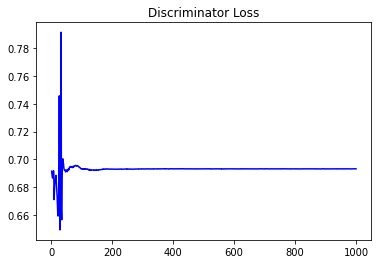

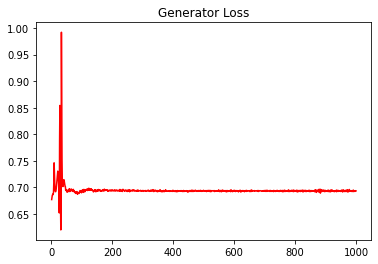

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.35574314467519635


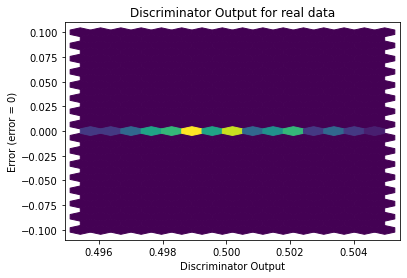

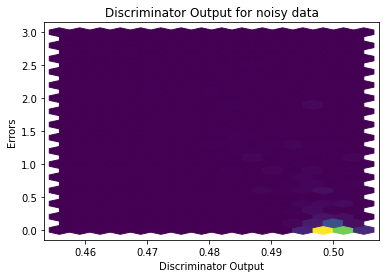

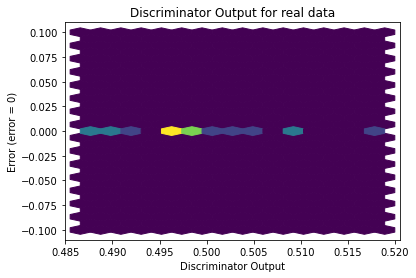

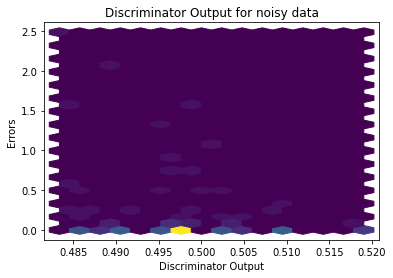

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


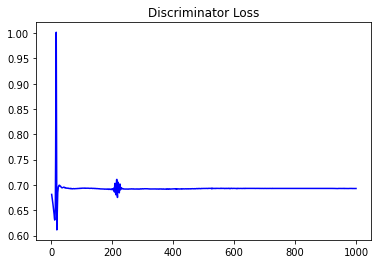

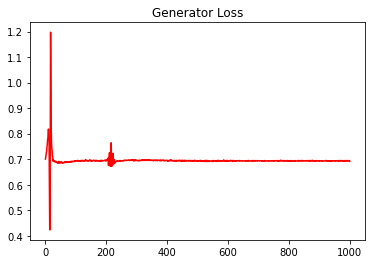

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.33467440438350365


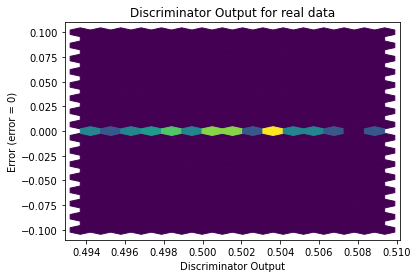

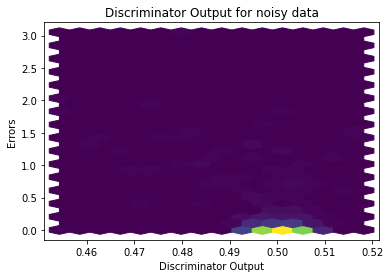

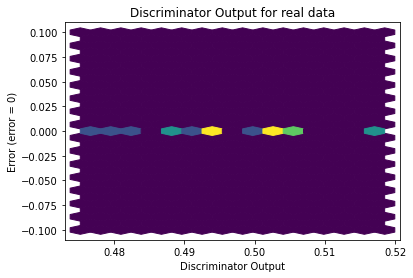

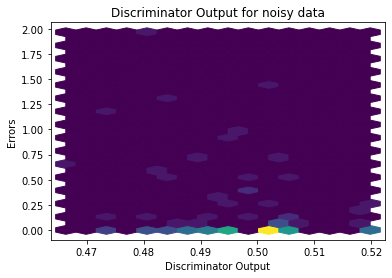

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0807]], requires_grad=True)
